In [1]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt

### Exacto

In [2]:
sz = np.array([[1,0],[0,-1]])
si = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])

h_open = -1*(np.kron(si, np.kron(sz, sz)) + np.kron(sz, np.kron(sz, si)) + np.kron(si, np.kron(sx, sx)) + np.kron(sx, np.kron(sx, si)) + np.kron(si, np.kron(sy, sy)) + np.kron(sy, np.kron(sy, si)))
ee1 = np.sort( np.linalg.eigvals(h_open) )

h_close = -1*(np.kron(si, np.kron(sz, sz)) + np.kron(sz, np.kron(sz, si)) + np.kron(si, np.kron(sx, sx)) + np.kron(sx, np.kron(sx, si)) + np.kron(si, np.kron(sy, sy)) + np.kron(sy, np.kron(sy, si))) +\
    -1*( np.kron(sz, np.kron(si, sz)) + np.kron(sx, np.kron(si, sx)) + np.kron(sy, np.kron(si, sy)) )
ee2 = np.sort( np.linalg.eigvals(h_close) )

### Variational quantum eigensolver

In [3]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [4]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [5]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(spin_chain.cost_function, spin_chain.qubits)

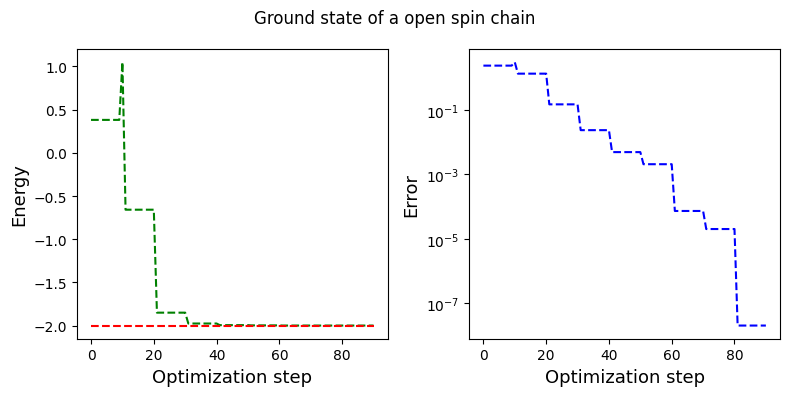

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a open spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee1[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee1[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

In [9]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "close",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [10]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [11]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(spin_chain.cost_function, spin_chain.qubits)

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


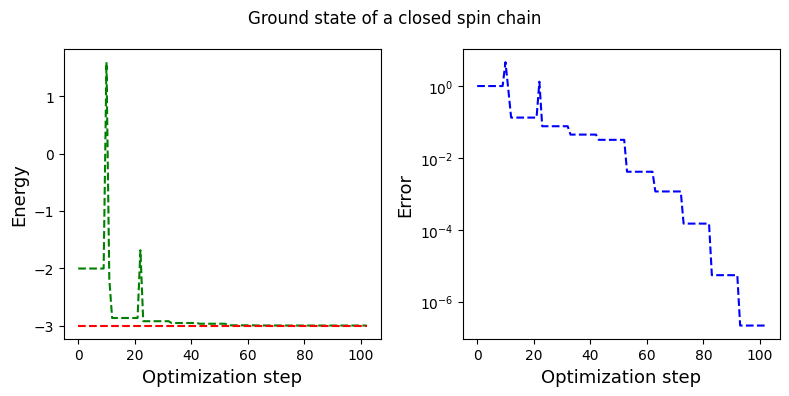

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a closed spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee2[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee2[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

### Variational quantum deflation

In [14]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [15]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [16]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*3}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum2 = optimizer.VQD(spin_chain.cost_function, spin_chain.overlap_cost_function, 2**spin_chain.qubits, spin_chain.qubits)

state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8


/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


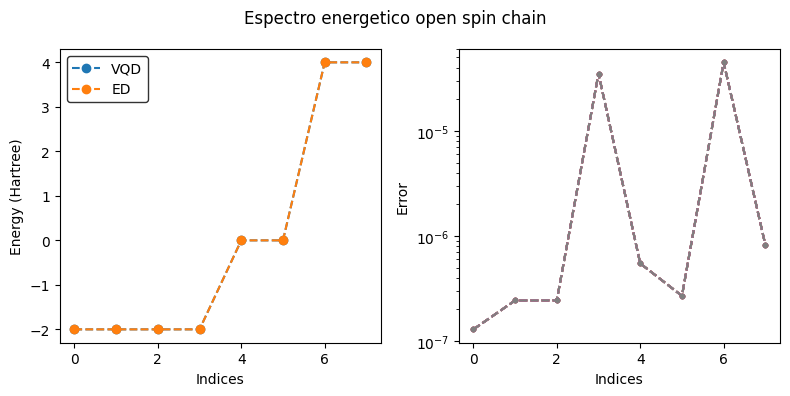

In [17]:
import matplotlib.pyplot as plt

exacto = np.sort(ee1)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Indices', fontsize=10)
ax[0].set_ylabel('Energy (Hartree)', fontsize=10)

ax[0].plot([i for i in range(len(energy))], np.sort(energy), "o--", label="VQD")
ax[0].plot([i for i in range(len(ee1))], exacto, "o--", label="ED")
ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Indices', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
for i in range(len(energy)):
    ax[1].plot([i for i in range(len(ee1))], [np.abs(float(j)- exacto[k]) for k,j in enumerate( np.sort(energy) )], ".", ls="dashed")
ax[1].set_yscale("log")

fig.suptitle('Espectro energetico open spin chain', fontsize=12)
fig.tight_layout()
plt.show()

In [18]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "close",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [21]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "ring"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [22]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*3}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum2 = optimizer.VQD(spin_chain.cost_function, spin_chain.overlap_cost_function, 2**spin_chain.qubits, spin_chain.qubits)

state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8


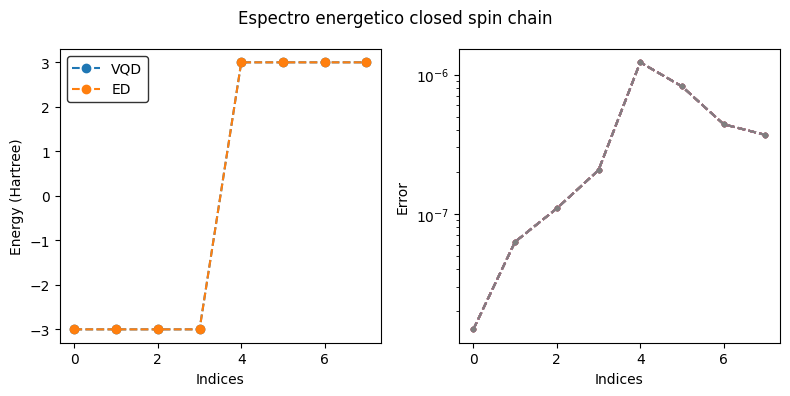

In [24]:
import matplotlib.pyplot as plt

exacto = np.sort(ee2)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Indices', fontsize=10)
ax[0].set_ylabel('Energy (Hartree)', fontsize=10)

ax[0].plot([i for i in range(len(energy))], np.sort(energy), "o--", label="VQD")
ax[0].plot([i for i in range(len(ee1))], exacto, "o--", label="ED")
ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Indices', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
for i in range(len(energy)):
    ax[1].plot([i for i in range(len(ee2))], [np.abs(float(j)- exacto[k]) for k,j in enumerate( np.sort(energy) )], ".", ls="dashed")
ax[1].set_yscale("log")

fig.suptitle('Espectro energetico closed spin chain', fontsize=12)
fig.tight_layout()
plt.show()